### Lorenz curves and heterogeneity in aggregation, and co-aggregation

[This paper](https://www.sciencedirect.com/science/article/pii/S0020751903001280?via=ihub#FIG2) talks about using Lorenz curves to graphically analyse whether aggregation, and also co-aggregation fits the 80:20 rule. Based on this, we can expect aggregation data to fit 80:20, and co-aggregation to have even greater heterogeneity.

The idea they used was to rank vertebrates based on their transmission potential.

The hosts are ranked on the total number of ticks aggregating.

Let:
- $ i \in [1,2,...,m] $ index the ranked vertebrates
- $ v_i $ is the proportion of ticks sampled on host $ i $
- $ h_i $ is the proportion of hosts (assume i/m)

Then

$ R_0 \propto \sum_{i=1}^m v_i^2 h_i $

Compare this to the traditional notion of aggregation:

$ R_0 \propto \sum_{i=1}^m v_i $

### Below are some attempts to understand the Perkins result

In [29]:
# Attempt 1

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
v = sum(burdens)
print("Aggregation 20%: {}".format(sum(burdens[0:4])/v)) # So we know that this data looks like a lot of tick burden data
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = (i+1)/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i**2 * h_i)
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)
# But it doesn't, so have I misinterpreted Perkins' formulation

Aggregation 20%: 0.8095238095238095
0.05 0.2893700787401575
0.1 0.6686351706036746
0.15 0.9068241469816273
0.2 0.9173228346456692
0.25 0.9206036745406824
0.3 0.9245406824146982
0.35 0.9291338582677166
0.4 0.9343832020997376
0.45 0.9402887139107613
0.5 0.9468503937007875
0.55 0.9540682414698163
0.6 0.9619422572178478
0.65 0.9704724409448819
0.7 0.9796587926509186
0.75 0.9895013123359581
0.8 1.0
0.85 1.0
0.9 1.0
0.95 1.0
1.0 1.0


In [30]:
# Attempt 2 - this time, remove burdens of 0

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1]
v = sum(burdens)
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = (i+1)/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i**2 * h_i)
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)
# Again, doesn't match Perkins result

0.0625 0.28937007874015747
0.125 0.6686351706036746
0.1875 0.9068241469816274
0.25 0.9173228346456693
0.3125 0.9206036745406825
0.375 0.9245406824146982
0.4375 0.9291338582677166
0.5 0.9343832020997376
0.5625 0.9402887139107612
0.625 0.9468503937007874
0.6875 0.9540682414698163
0.75 0.9619422572178478
0.8125 0.9704724409448819
0.875 0.9796587926509187
0.9375 0.9895013123359581
1.0 1.0


In [31]:
# Attempt 3 - is h_i a constant?

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
v = sum(burdens)
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = 1/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i**2 * h_i)
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)
# Again, doesn't match Perkins result (even more hetergeneity)

0.05 0.5086505190311416
0.1 0.8419838523644746
0.15 0.9815455594002299
0.2 0.9861591695501724
0.25 0.987312572087658
0.3 0.9884659746251436
0.35 0.9896193771626293
0.4 0.9907727797001149
0.45 0.9919261822376005
0.5 0.9930795847750862
0.55 0.9942329873125718
0.6 0.9953863898500575
0.65 0.9965397923875431
0.7 0.9976931949250287
0.75 0.9988465974625144
0.8 1.0
0.85 1.0
0.9 1.0
0.95 1.0
1.0 1.0


In [32]:
# Attempt 4 - v_i instead of v_i**2

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
v = sum(burdens)
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = (i+1)/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i * h_i)
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)
# Again, doesn't match Perkins result (less hetergeneity), although the curve is still above the identity function

0.05 0.0945945945945946
0.1 0.24774774774774774
0.15 0.39639639639639646
0.2 0.4324324324324325
0.25 0.454954954954955
0.3 0.48198198198198205
0.35 0.5135135135135136
0.4 0.5495495495495496
0.45 0.5900900900900902
0.5 0.6351351351351352
0.55 0.6846846846846848
0.6 0.7387387387387389
0.65 0.7972972972972974
0.7 0.8603603603603603
0.75 0.9279279279279279
0.8 1.0
0.85 1.0
0.9 1.0
0.95 1.0
1.0 1.0


In [33]:
# Attempt 5 - just v_i, which is just the traditional notion of 80:20

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
v = sum(burdens)
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = (i+1)/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i)
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)


0.05 0.33333333333333354
0.1 0.6031746031746036
0.15 0.7777777777777782
0.2 0.80952380952381
0.25 0.8253968253968259
0.3 0.8412698412698417
0.35 0.8571428571428575
0.4 0.8730158730158734
0.45 0.8888888888888892
0.5 0.904761904761905
0.55 0.9206349206349209
0.6 0.9365079365079367
0.65 0.9523809523809526
0.7 0.9682539682539684
0.75 0.9841269841269842
0.8 1.0
0.85 1.0
0.9 1.0
0.95 1.0
1.0 1.0


In [34]:
# Attempt 6 - do they mean 1/h_i, as in Woolhouse etc

burdens = [21,17,11,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
v = sum(burdens)
m = len(burdens)

transmission_potentials = []
for i in range(0,m):
    v_i = (burdens[i]/v)
    h_i = (i+1)/m # I interpret this as not being constant, but details are lacking
    transmission_potentials.append(v_i**2 * (1/h_i))
transmission_potential_total = sum(transmission_potentials)

for h in range(1,m+1): #4/20 is 20%, should show 80% of transmission potential
    print((h)/m, sum(transmission_potentials[0:h])/transmission_potential_total)


0.05 0.7020831486891861
0.1 0.9321308017177289
0.15 0.9963424880301941
0.2 0.9979345133106684
0.25 0.9982529183667632
0.3 0.998518255913509
0.35 0.9987456880964339
0.4 0.9989446912564932
0.45 0.9991215829543237
0.5 0.9992807854823712
0.55 0.9994255150533234
0.6 0.9995581838266963
0.65 0.9996806473098098
0.7 0.9997943634012721
0.75 0.9999004984199704
0.8 1.0
0.85 1.0
0.9 1.0
0.95 1.0
1.0 1.0


So it looks to me like the only promising treatment is to remove the hosts that have no ticks.

### Tick-Verterbrate-Year combinations to analyse

Some datasets don't have enough ticks to analyse (see Kielder Forest analysis in thesis)

Analyse:
- 2004: I. ricinus, SA
- 2004: I. trianguliceps, SA
- 2005: I. trianguliceps, SA
- 2005: I. ricinus, FV
- 2005: I. trianguliceps, FV


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from coaggregation_offspring import get_aggregation_per_vertebrate, get_coaggregation_per_vertebrate

In [36]:
from scipy.integrate import simpson

def gini_coefficient(line_pts):
    curve_area = simpson(line_pts, dx=1)
    # In all cases, the x-axis is 1:100, and y is 0:1, so the area under the identity function is (1*100)/2 = 50
    B = 50
    A = abs(curve_area - B) # This way, the curve can be above or below, or both, compared to the identity function
    return A/B

### Difference between traditional notion of aggregation and Perkins calculation

This shows that the gini coefficient for both approaches is approximately the same, for whatever subset of Kielder Forest data you like

In [37]:

def plot_lorenz_curve_Perkins_And_Aggregation(data, title, remove_zero):
    if remove_zero:
        data = [x for x in data if x != 0]
    descending_data = sorted(data)
    descending_data.reverse()
    m = len(descending_data)
    v = sum(descending_data)
    removal_count = 100
    h_step = m/removal_count
    
    h_percent = list(range(1,removal_count+1))
    identity_function = [0.01 + (x * 0.01) for x in range(0, 100)]
    
    transmission_potential = []
    for i in list(range(0, m)):
        v_i = descending_data[i]/v
        h_i = (i+1)/m
        transmission_potential.append(v_i**2 * h_i)
    total_transmission_potential = sum(transmission_potential)

    # QUESTION - SHOULD WE SORT THE LIST ONCE THE CALCULATION IS DONE? THE INCREASING h_i TERM MEANS THIS LIST WILL BE UNSORTED
    # I SAY NO, IF YOU HAVE A LOOK AT THE PERKINS CHART, THE CURVE THAT INTERPOLATES THE POINTS IS NOT SMOOTH
    #print(transmission_potential)
    #transmission_potential = sorted(transmission_potential)
    #transmission_potential.reverse()
    #print(transmission_potential)
    
    aggregation_percentage = []
    transmission_potential_percentage = []
    
    for j in h_percent:
        h_j = round(j*h_step) # this many vertebrates in calculation
        v_j = sum(descending_data[0:h_j])/v
        # Traditional notion of aggregation - 20% of hosts support 80% of vertebrates
        aggregation_percentage.append(v_j)
    
        v_j = sum(transmission_potential[0:h_j])/total_transmission_potential
        transmission_potential_percentage.append(v_j)

    print(gini_coefficient(transmission_potential_percentage))
    print(gini_coefficient(aggregation_percentage))

    plt.plot(h_percent, transmission_potential_percentage, label="Perkins (transmission potential)", marker=".", markersize=2)
    plt.plot(h_percent, aggregation_percentage, label="Cumulative total", marker="s", markersize=2)
    plt.plot(h_percent, identity_function, label="Identity", marker="p", markersize=2)
    plt.vlines(20,0,1, linestyles="dotted")
    plt.xlabel("Percentage of hosts")
    plt.ylabel("Cumulative total of transmission potential")
    plt.title(title)
    plt.legend()
    plt.show()

Vertebrates:  3801
0.8310688142956935
0.8489869737148175


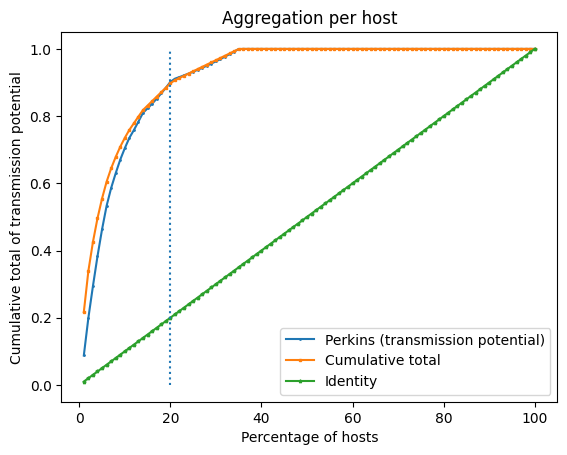

0.9736383423733187
0.9740029761904762


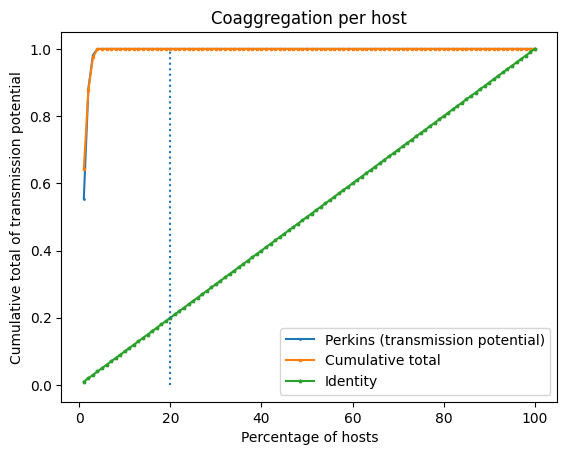

In [38]:
"""
Try this for any of the 5 combinations from the Kielder data, and the Perkins calculation 
more-or-less has the same Gini coefficient as the traditional notion of aggregation, although 
we should note that no subset of Kielder data follows 80:20
"""

df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") | (df["Species"] == "FV")]
#data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = True

"""
Note: it's not clear to me whether Perkins et al considered only hosts that had some ticks, or all hosts. 
My guess is they considered all hosts. 
"""

aggregation_per_vertebrate = get_aggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
plot_lorenz_curve_Perkins_And_Aggregation(aggregation_per_vertebrate, "Aggregation per host", False)

coaggregation_per_vertebrate = get_coaggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
plot_lorenz_curve_Perkins_And_Aggregation(coaggregation_per_vertebrate, "Coaggregation per host", False)

### Using Perkins calculations for Kielder Forest data

This makes the assumption that we have understood the use of "Co-feeding groups" correctly, which is implimented as aggregation involving at least one larva and one nymph.

In [39]:
def get_Perkins_curve(data, remove_zero):
    if remove_zero:
        data = [x for x in data if x != 0]
    descending_data = sorted(data)
    descending_data.reverse()
    m = len(descending_data)
    v = sum(descending_data)
    removal_count = 100
    h_step = m/removal_count
    
    h_percent = list(range(1,removal_count+1))
    identity_function = [0.01 + (x * 0.01) for x in range(0, 100)]
    
    transmission_potential = []
    for i in list(range(0, m)):
        v_i = descending_data[i]/v
        h_i = (i+1)/m
        transmission_potential.append(v_i**2 * h_i)
    total_transmission_potential = sum(transmission_potential)

    # QUESTION - SHOULD WE SORT THE LIST ONCE THE CALCULATION IS DONE? THE INCREASING h_i TERM MEANS THIS LIST WILL BE UNSORTED
    # I SAY NO, IF YOU HAVE A LOOK AT THE PERKINS CHART, THE CURVE THAT INTERPOLATES THE POINTS IS NOT SMOOTH
    #print(transmission_potential)
    #transmission_potential = sorted(transmission_potential)
    #transmission_potential.reverse()
    #print(transmission_potential)
    
    transmission_potential_percentages = []
    for j in h_percent:
        h_j = round(j*h_step) # this many vertebrates in calculation
        v_j = sum(transmission_potential[0:h_j])/total_transmission_potential
        transmission_potential_percentages.append(v_j)

    return transmission_potential_percentages

def plot_Perkins_curves(aggregation_per_vertebrate, coaggregation_per_vertebrate, title=None, remove_zero=False):
    aggregation_transmission_potential_percentages = get_Perkins_curve(aggregation_per_vertebrate, remove_zero)
    coaggregation_transmission_potential_percentages = get_Perkins_curve(coaggregation_per_vertebrate, remove_zero)

    #print(coaggregation_transmission_potential_percentages)
    
    print("aggregeation transmission potential GINI: ", gini_coefficient(aggregation_transmission_potential_percentages))
    print("coaggregeation transmission potential GINI: ", gini_coefficient(coaggregation_transmission_potential_percentages))
    
    removal_count = 100
    h_percent = list(range(1,removal_count+1))
    identity_function = [0.01 + (x * 0.01) for x in range(0, 100)]
    
    plt.plot(h_percent, aggregation_transmission_potential_percentages, label="Aggregation data", marker=".", markersize=2)
    plt.plot(h_percent, coaggregation_transmission_potential_percentages, label="Co-aggregation data", marker="s", markersize=2)
    plt.plot(h_percent, identity_function, label="Identity", marker="p", markersize=2)
    plt.vlines(20,0,1, linestyles="dotted")
    plt.xlabel("Percentage of hosts")
    plt.ylabel("Cumulative total")
    plt.title(title)
    plt.legend()
    plt.show()

Vertebrates:  3801
aggregeation transmission potential GINI:  0.8310688142956935
coaggregeation transmission potential GINI:  0.9736383423733187


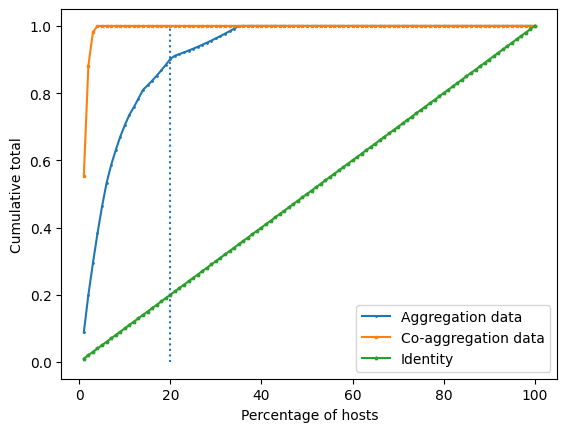

In [40]:
# First, do it for all data

df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") | (df["Species"] == "FV")]
#data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = True

aggregation_per_vertebrate = get_aggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
coaggregation_per_vertebrate = get_coaggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
plot_Perkins_curves(aggregation_per_vertebrate, coaggregation_per_vertebrate, remove_zero=False)

In [41]:
# individual data

df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") ]
data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = False

aggregation_per_vertebrate = get_aggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
coaggregation_per_vertebrate = get_coaggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)

plot_Perkins_curves(aggregation_per_vertebrate, coaggregation_per_vertebrate, remove_zero=False)

Vertebrates:  0


ZeroDivisionError: division by zero

In [ ]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "SA") ]
data = data[data["Year"] == 2004]
print("Vertebrates: ", len(data))
ricinus = False
trianguliceps = True

aggregation_per_vertebrate = get_aggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
coaggregation_per_vertebrate = get_coaggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
plot_Perkins_curves(aggregation_per_vertebrate, coaggregation_per_vertebrate)

In [ ]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "FV") ]
data = data[data["Year"] == 2005]
print("Vertebrates: ", len(data))
ricinus = True
trianguliceps = False

aggregation_per_vertebrate = get_aggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
coaggregation_per_vertebrate = get_coaggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
plot_Perkins_curves(aggregation_per_vertebrate, coaggregation_per_vertebrate)

In [27]:
df = pd.read_excel(open('Kielder_data_NGM.xlsx', 'rb'),
              sheet_name='Burden Data')

data = df[(df["Species"] == "FV") | (df["Species"] == "SA")]
data = data[data["Year"] == 2005]
print("Vertebrates: ", len(data))
ricinus = False
trianguliceps = True

aggregation_per_vertebrate = get_aggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
coaggregation_per_vertebrate = get_coaggregation_per_vertebrate(data, ricinus=ricinus, trianguliceps=trianguliceps)
plot_Perkins_curves(aggregation_per_vertebrate, coaggregation_per_vertebrate)

Vertebrates:  0


ZeroDivisionError: division by zero